In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

In [54]:
N = 10_000
prior = 1/1_000

X, y = make_classification(
    n_samples=N, 
    n_features=2, 
    weights=[1-prior, prior], 
    random_state=42,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=3, 
)

X, y = make_blobs(n_samples=[N,N/10], centers=[[0,0],[4,4]], cluster_std=[10.0, 3], random_state=22, n_features=2)

arr = np.arange(N)
random_indices = np.random.choice(arr.size, size=1000, replace=False)

def plot(X,y):
    plt.scatter(X[random_indices,0], X[random_indices,1], c=y[random_indices], marker='.');
    
plot(X,y)

TypeError: 'float' object cannot be interpreted as an integer

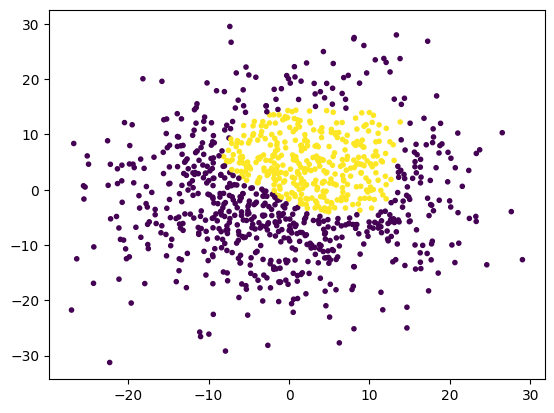

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB

clf = make_pipeline(
    StandardScaler(), 
    SVC(class_weight='balanced')
)
clf.fit(X, y)
y_pred = clf.predict(X)

plot(X, y_pred);

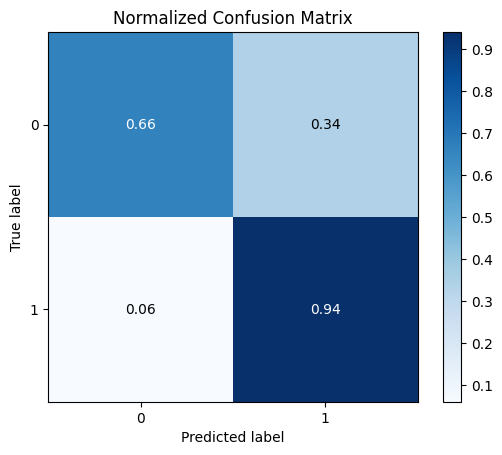

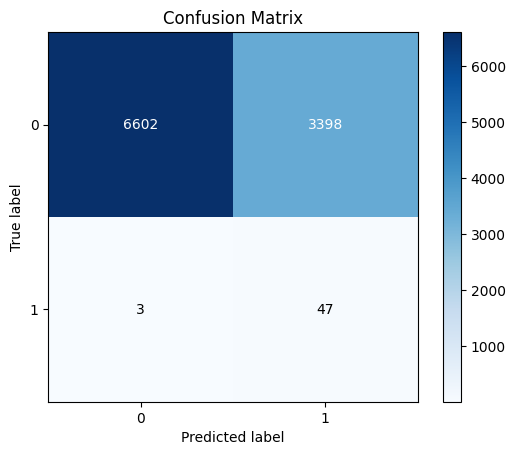

In [47]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y, y_pred, normalize=True);
skplt.metrics.plot_confusion_matrix(y, y_pred, normalize=False);

In [48]:
from sklearn.metrics import precision_score

precision = precision_score(y, y_pred, average='binary')
precision

0.013642960812772133

In [49]:
unique_values, counts = np.unique(y, return_counts=True)
prior = counts[1]/counts[0]
prior

0.005

In [50]:
from sklearn.metrics import recall_score

recall = recall_score(y, y_pred)
recall

0.94

In [51]:
marginal = sum(y_pred) / len(y_pred) 

In [52]:
prior=0.001
true_prob = (recall * prior) / marginal
true_prob

0.002742235123367199

In [53]:
(true_prob) / prior

2.7422351233671987

In [76]:
prior

0.015228426395939087